# City Salary Data Analyis
One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

# Exploration Ideas

* How have salaries changed over time between different groups of people?
* How are base pay, overtime pay, and benefits allocated between   different groups?
* Is there any evidence of pay discrimination based on gender in this dataset?
* How is budget allocated based on different groups and responsibilities?

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read the data

In [2]:
# read salaries datasets
salaries = pd.read_csv('../data/Salaries.csv',low_memory=False)

In [3]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Basic data study

In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [5]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [6]:
salaries.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109724
OvertimePay          66162
OtherPay             84243
Benefits             98647
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

In [7]:
salaries.Status.value_counts()

FT    22334
PT    15785
Name: Status, dtype: int64

In [8]:
salaries[salaries.Status.notnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT


In [9]:
salaries.Status.value_counts(dropna = False, normalize = True)*100

NaN    74.357232
FT     15.024150
PT     10.618618
Name: Status, dtype: float64

In [10]:
salaries.Agency.unique()

array(['San Francisco'], dtype=object)

#### What are your observations about the basic statistics of data?

## What columns do you think do not add value to our analysis? Drop those columns.

In [11]:
salaries.drop(['Id','Notes','Agency','Status'],axis = 1, inplace = True)
# salaries.drop(columns = ['Id','Notes','Agency','Status'], inplace = True)
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011


In [12]:
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011


## Check for missing values in the data, what is the strategy you will apply to deal with missing values?

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64


<AxesSubplot:>

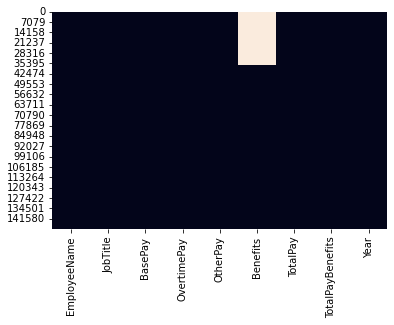

In [13]:
#now, we are checking start with a pairplot, and check for missing values

print(salaries.isnull().sum())
sns.heatmap(salaries.isnull(),cbar=False)


In [14]:
salaries[salaries['Benefits'].isnull()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
36154,SERENA HUGHES,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0.0,0.0,4.17,NaN,4.17,4.17,2011
36155,JOE BROWN JR,TRANSIT OPERATOR,0.0,0.0,0.3,NaN,0.30,0.30,2011
36156,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.00,0.00,2011
36157,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.00,0.00,2011


There is a posibility of people getting zero amount as benefit so, it is better to replace null values with 0.

We can drop the rows with null values in basepay as it can be misleading if there is no basepay information

In [15]:
salaries.Benefits.fillna(0, inplace = True)

In [16]:
salaries.isnull().sum()

EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
dtype: int64

In [17]:
salaries.dropna(inplace = True)

In [18]:
salaries.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

There are a few rows which contain the value 'Not Provided' in most of the columns, delete those rows

## Convert the object values of all the types of pays to numeric, use to_numeric method of pandas to convert. Is it as straightforward or there is some descripency? if yes, how will you overcome it?

In [19]:
salaries[salaries['BasePay'] == "Not Provided"]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014


In [19]:
salaries = salaries[~(salaries['BasePay'] == "Not Provided")]

In [20]:
salaries[salaries['BasePay'] == "Not Provided"]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year


In [21]:
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,0,326373.19,326373.19,2011


In [23]:
for column in salaries[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']]:
    salaries[column] = pd.to_numeric(salaries[column])

In [24]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148045 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148045 non-null  object 
 1   JobTitle          148045 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148045 non-null  float64
 4   OtherPay          148045 non-null  float64
 5   Benefits          148045 non-null  float64
 6   TotalPay          148045 non-null  float64
 7   TotalPayBenefits  148045 non-null  float64
 8   Year              148045 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 11.3+ MB


## Find the job titles of the 10 highest median base pay

Base Pay -> The most basic sum of money or hourly rate paid to an employee of a business in compensation for their work efforts or time spent on the job

In [25]:
# round(salaries.groupby(['JobTitle'])['BasePay'].median(),3).nlargest(10)

In [26]:
salaries['JobTitle'] = salaries.JobTitle.str.lower()

In [27]:
salaries['JobTitle'] = salaries.JobTitle.str.replace(' iii', ' 3').str.replace(' ii', ' 2').str.replace(' i', ' 1')

In [28]:
salaries.groupby('JobTitle')['BasePay'].median().nlargest(10)

JobTitle
chief of police                           305014.020
chief, fire department                    302068.000
gen mgr, public trnsp dept                294000.180
chief of department, (fire department)    285262.000
dep dir for 1nvestments, ret              276153.765
dept head v                               270616.270
adm, sfgh medical center                  268946.020
controller                                267914.000
deputy chief 3                            263408.550
dep chf of dept (fire dept)               260728.000
Name: BasePay, dtype: float64

## Find the job titles of the 10 highest median Overtime Pay


Overtime Pay -> Additional financial compensation for any hours worked by nonexempt staff over the amount of forty hours per week.

In [29]:
round(salaries.groupby(['JobTitle'])['OvertimePay'].median(),3).nlargest(10)


JobTitle
wire rope cable maint sprv                      81313.490
wire rope cable maintenance supervisor          66164.730
trnst power line wrk sprv 2                     66006.100
battalion chief, fire suppress                  49833.050
senior power generation technician              46504.350
assistant 1nspector (police department)         45679.840
mechanical shop and equipment superintendent    44930.700
transit power line sprv1                        44422.370
incident support specialist                     43656.095
asst chf of dept (fire dept)                    43389.970
Name: OvertimePay, dtype: float64

## Plot the sectors which have provided the maximum  number of employment

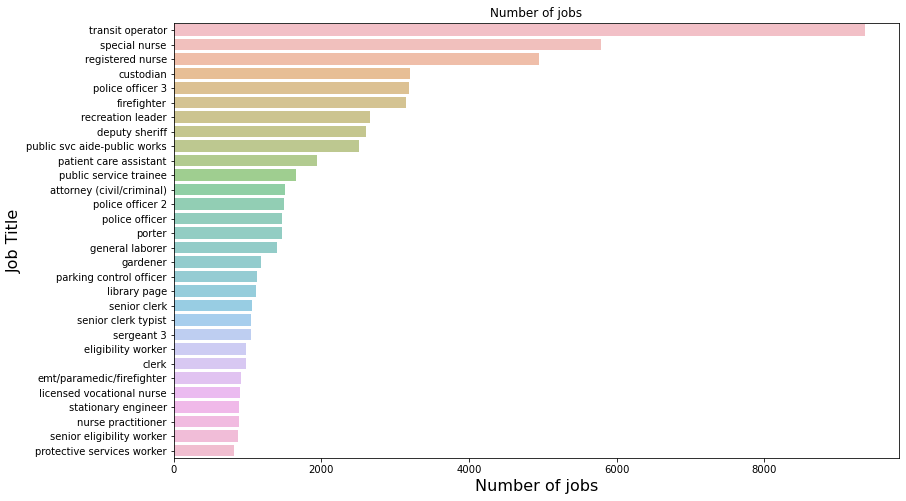

In [30]:
#Top 30 sectors for SF salary analysis
plt.figure(figsize=(13,8))
sectors = salaries['JobTitle'].value_counts()[0:30]
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.xlabel('Number of jobs', fontsize=16)
plt.ylabel("Job Title", fontsize=16)
plt.title("Number of jobs")
plt.show()

## Plot the top 10 Job titles with highest mean TotalPayBenefits

<AxesSubplot:xlabel='JobTitle'>

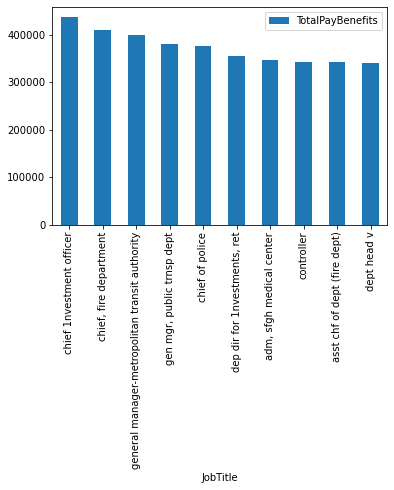

In [31]:
top_mean = salaries.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending = False)[:10].reset_index()

top_mean.plot(x = 'JobTitle',y = 'TotalPayBenefits',kind = 'bar')

## Find the highest paid employees for the year 2012, 2013 and 2014



In [32]:
salaries.groupby(['Year','JobTitle']).TotalPayBenefits.mean().idxmax()

(2014, 'chief 1nvestment officer')

In [33]:
(salaries
 .groupby('Year')
 .agg({'TotalPayBenefits':'max', 'EmployeeName':'max'})
 .EmployeeName 
)


Year
2011     ZURI JONES
2012     Zuri Jones
2013    Zuri  Jones
2014     Zuri Jones
Name: EmployeeName, dtype: object

In [34]:
salaries.loc[
(salaries
 .loc[salaries.Year.isin([2012,2013,2014])]
 .groupby('Year')
 .TotalPayBenefits
 .idxmax()
)
]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,Gary Altenberg,"lieutenant, fire suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
72925,Gregory P Suhr,chief of police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013
110531,David Shinn,deputy chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014


In [36]:
years = [2012,2013,2014]

for year in years:
    
    name = salaries[salaries['Year'] == year].sort_values(by = 'TotalPay',ascending = False)['EmployeeName'].iloc[0]
    salary = salaries[salaries['Year'] == year].sort_values(by = 'TotalPay',ascending = False)['TotalPay'].iloc[0]
    print(name,'was the highest paid employee','for the year',year,'with a salary of', salary)


Gary Altenberg was the highest paid employee for the year 2012 with a salary of 362844.66
Samson  Lai was the highest paid employee for the year 2013 with a salary of 347102.32
David Shinn was the highest paid employee for the year 2014 with a salary of 471952.64
